In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [4]:
# Importing required libraries
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

2025-07-21 03:08:38.550464: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753067318.806650      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753067318.881147      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
#  1: Defining the original dataset path
original_path = "/kaggle/input/multi-cancer/Multi Cancer/Multi Cancer/Cervical Cancer"


In [6]:
#  2: Copying dataset to a writable directory for splitting the data
base_path = "/kaggle/working/cervical_cancer_data"

if not os.path.exists(base_path):
    os.makedirs(base_path)
    for folder in os.listdir(original_path):
        src_folder = os.path.join(original_path, folder)
        dest_folder = os.path.join(base_path, folder)
        shutil.copytree(src_folder, dest_folder)

In [7]:
#  3: Using ImageDataGenerator to load and split the images
# Here we split the data into: 70% training, 15% validation, 15% test
train_val_split = 0.3  # 30% for validation + test

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=train_val_split  # We'll further split this inside
)

# Training generator (70%)
train_generator = datagen.flow_from_directory(
    base_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

# spliting the validation portion (30%) into 15% val, 15% test
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.5)

# Validation generator (15%)
validation_generator = val_test_datagen.flow_from_directory(
    base_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

# Test generator (15%)
test_generator = val_test_datagen.flow_from_directory(
    base_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Important for correct evaluation
)


Found 17500 images belonging to 5 classes.
Found 12500 images belonging to 5 classes.
Found 12500 images belonging to 5 classes.


In [8]:
#  4: Defining the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # 5 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-21 03:17:05.593253: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
#  5: Compiling the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
#  6: Training the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 559s 1s/step - accuracy: 0.6194 - loss: 0.9645 - val_accuracy: 0.9044 - val_loss: 0.2703
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 564s 1s/step - accuracy: 0.9243 - loss: 0.2187 - val_accuracy: 0.9309 - val_loss: 0.1985
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 573s 1s/step - accuracy: 0.9478 - loss: 0.1523 - val_accuracy: 0.9880 - val_loss: 0.0372
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 564s 1s/step - accuracy: 0.9855 - loss: 0.0482 - val_accuracy: 0.9862 - val_loss: 0.0440
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 620s 1s/step - accuracy: 0.9769 - loss: 0.0701 - val_accuracy: 0.9934 - val_loss: 0.0246
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 618s 1s/step - accuracy: 0.9964 - loss: 0.0140 - val_accuracy: 0.9929 - val_loss: 0.0222
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 532s 973ms/step - accuracy: 0.9835 - loss: 0.0553 - val_accuracy: 0.9996 - val_loss: 0.0023
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 594s 1s/step - accuracy: 0.9875 - loss: 0.0445 - val_a

In [12]:
# Step 7: Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"❌ Test Loss: {test_loss:.4f}")


391/391 ━━━━━━━━━━━━━━━━━━━━ 103s 263ms/step - accuracy: 0.9627 - loss: 0.1382
✅ Test Accuracy: 0.9634
❌ Test Loss: 0.1347


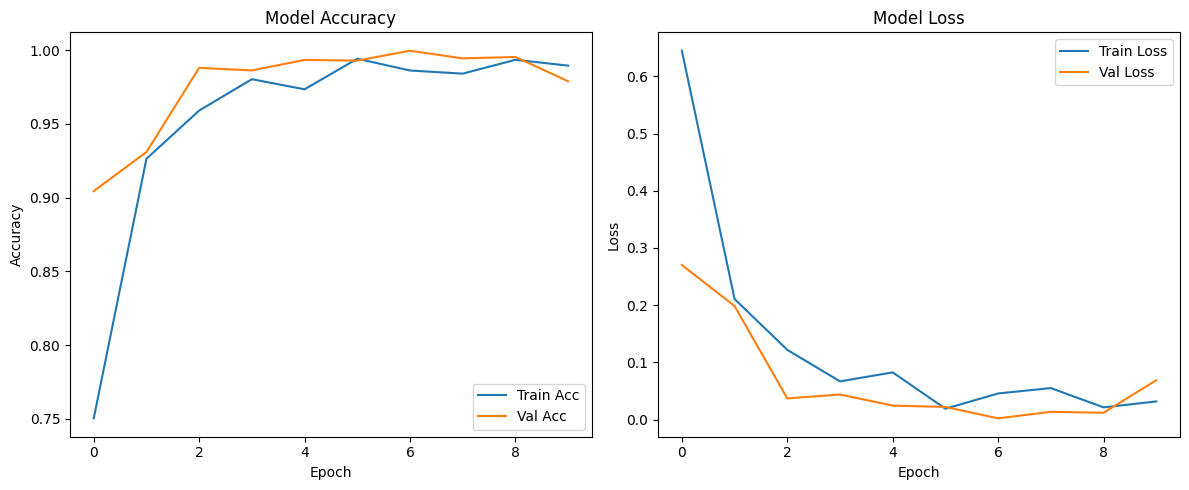

In [13]:
#  8: Plot training/validation accuracy and loss
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


391/391 ━━━━━━━━━━━━━━━━━━━━ 100s 256ms/step
📊 Classification Report:

              precision    recall  f1-score   support

  cervix_dyk       0.89      0.99      0.94      2500
  cervix_koc       0.99      0.89      0.94      2500
  cervix_mep       0.97      0.98      0.97      2500
  cervix_pab       1.00      0.97      0.98      2500
  cervix_sfi       0.99      0.98      0.99      2500

    accuracy                           0.96     12500
   macro avg       0.97      0.96      0.96     12500
weighted avg       0.97      0.96      0.96     12500



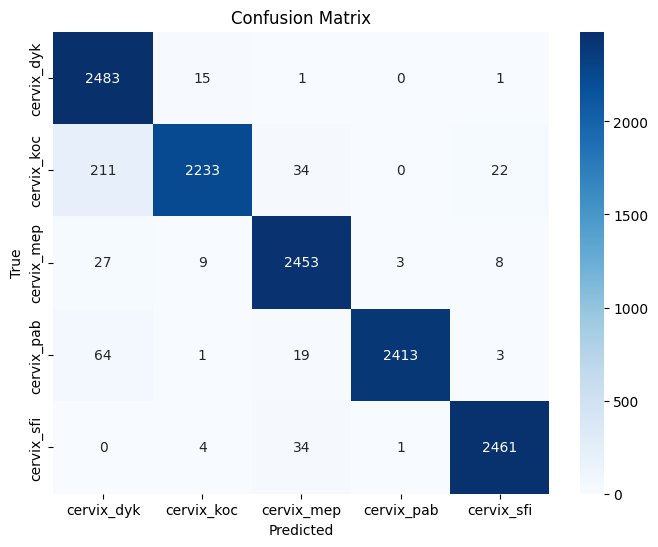

In [14]:
#  Confusion Matrix and Classification Report
# Predict test data
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print("📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix heatmap
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()